# Линейная регрессия

* Какие проблемы решает линейная регрессия

* Линейные функции

* Функция потерь

* Производная

* Градиентный спуск

* Реализация на Python и NumPy

## Почему мы изучаем линейную регрессию, а не глубокие нейронные сети? 

* Легка для понимания 

* Можно рассмотреть основные идеи машинного обучения

* До сих пор применяется

## Постановка задачи 

$X$ - часть свободного времени которые студенты тратят на учебу. 

$y$ - средняя оценка студента по всем предметам.

Наша задача найти зависимость между $Х$ и $y$. То есть, нужно найти функцию $f(X) = y$.

## Постановка задачи

Можно представить, что пары значений данных ($x$, $y$) - это значения функции $f(X)$ в точках $Х$. И задача регрессии — это построить функцию (некую линию) которая может *описать* эти данные.

Например, студент тратит 0.1 свободного времени на учебу. 

$f(0.1) = 3$. *Ответ: $у=3$*.

То есть, необходимо по имеющимся данным построить зависимость интересующей нас переменной от каких то других параметров.

В общем случае задача регрессии - это по входным данным найти число в каком-то *непрерывном* диапазоне. Например: $(-1, 1)$ или же $R$.

## Другой пример регрессии 

* Предсказание количество посетителей в интересующие нас время в интернет магазине.

* Предсказание цены квартиры в зависимости от площади 

## Загрузка данных

Рассмотрим подробнее пример с $Х$ и $y$.

In [1]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

После этого в векторе $X$ содержится доля свободного времени студента, потраченная на учебу, а в векторе $y$ средняя оценка. 

## Визуализация данных

In [2]:
visualize_Xy(X, y)    

    Доля свободного времени, потраченного на учебу  Средняя оценка
0                                             0.10            3.18
1                                             0.12            4.80
2                                             0.13            3.31
3                                             0.13            4.18
4                                             0.14            4.03
5                                             0.18            5.08
6                                             0.21            5.31
7                                             0.26            5.35
8                                             0.26            5.61
9                                             0.26            5.52
10                                            0.28            6.31
11                                            0.29            6.64
12                                            0.29            5.47
13                                            0.35            

$X$ и $y$ - это массивы NumPy ndarray с 20 элементами. 

## Подробнее про $X$ и $y$

Тип $X$ и $y$.

In [3]:

print(f"Тип переменной X: {type(X)}")
print(f"Тип переменной y: {type(y)}")

Тип переменной X: <class 'numpy.ndarray'>
Тип переменной y: <class 'numpy.ndarray'>


Значения массива X:

In [4]:
print(X)

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Значения массива y:

In [5]:
print(y)

[3.18 4.8  3.31 4.18 4.03 5.08 5.31 5.35 5.61 5.52 6.31 6.64 5.47 7.83
 7.63 9.04 9.11 9.83 9.42 8.71]


$X_i$ в тексте - это ***X[i]*** в коде.

In [6]:
print(X[0])

0.1


In [7]:
print(X)

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


## Визуализация данных

Отобразим эти данные на графике. Черные точки - это пары $х$, $у$.

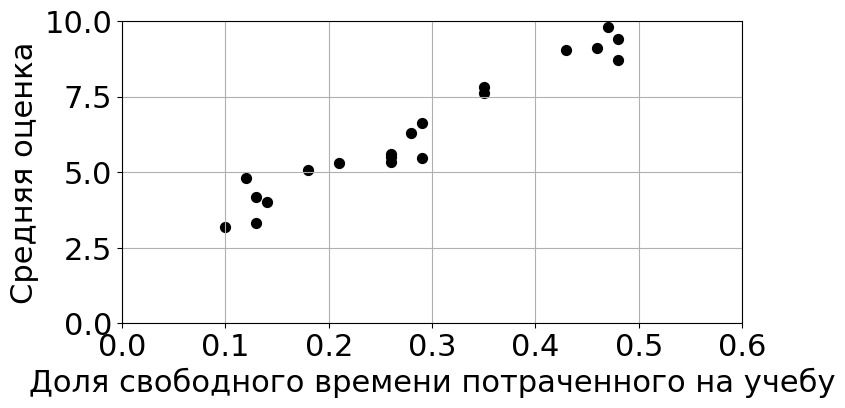

In [8]:
# Строим график с точками
plot_data(X, y)      

Между этими данными есть зависимость.

Точки примерно лежат на одной линии с неким "шумом".

## Линейная функция

Линейной функция:

$y = kX$, 

где $X$ это доля времени студента, $y$ средняя оценка, а $k$ - это некий коэффициент. Также $k$ называют параметром функции и весом функции.

Давайте посмотрим, как выглядят функции вида $y = kX$ с разными коэффициентами $k$.

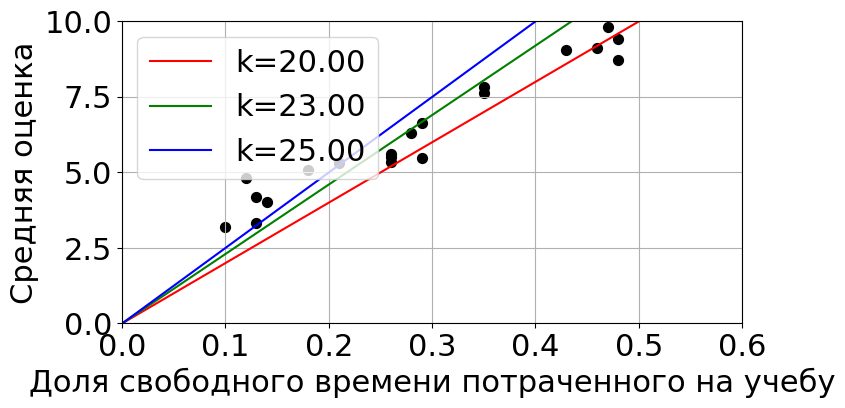

In [9]:
plot_several_good_linear_functions(X, y)

## Реализуем линейную функцию на Python

Для каждого элемента $X_i$ массива $X$ реализовать функцию $f(X_i) = kX_i$.

На входе:
* Массив ndarray $X$;
* Значение коэффициента $k$;

На выходе:
* На выходе массив ndarray со значениями $f(X_i) = kX_i$;

In [10]:
def dummy_f(X, k):
    # Создаем результирующий список, где будем сохранять значения функции
    result = []                  
    
    # Переменная i в цикле будет менять свое значение в диапазоне (range) от 0 до размера массива X (len(X))
    for i in range(len(X)):    
        
        # Считаем значение y для i-этого элемента массива X
        y_i = k*X[i]    
        
        # Добавляем результат в результирующий список
        result.append(y_i)
        
    # Создаем из списка массив ndarray    
    return np.array(result)

print(dummy_f(X, 1))

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Можно воспользоваться возможностями NumPy.

Для каждого элемента $X_i$ массива $X$ реализовать функцию $f(X_i) = kX_i$.

На входе:
* Массив ndarray $X$;
* Значение коэффициента $k$;

На выходе:
* На выходе массив ndarray со значениями $f(X_i) = kX_i$;

In [11]:
def f(X, k):
    # Используем возможность ndarray и умножим массив X на скаляр k
    # Результат этой операции это ndarray
    return k*X

print(f(X, 1))

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


При этом, эта функция также работает и для одного элемента.

In [66]:
print(f(X, 1))

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


In [13]:
print(f(X[0], 1))

0.1


## Почему NumPy?

Разница во времени выполнения функций dummy_f и f на массиве ndarray с 100000 элементов.

Функция                | Среднее время (микросекунд) 
-----------------------|-----------------------------
dummy_f     | 31400                       
f                      | 70                          

Как видно из таблицы, функция, написанная с помощью NumPy быстрее в 45 раз!

*Примечание: время выполнения может отличаться на разных компьютерах.*


## Функция ошибки

Давайте снова посмотрим на различные линейные функции с различными $k$.

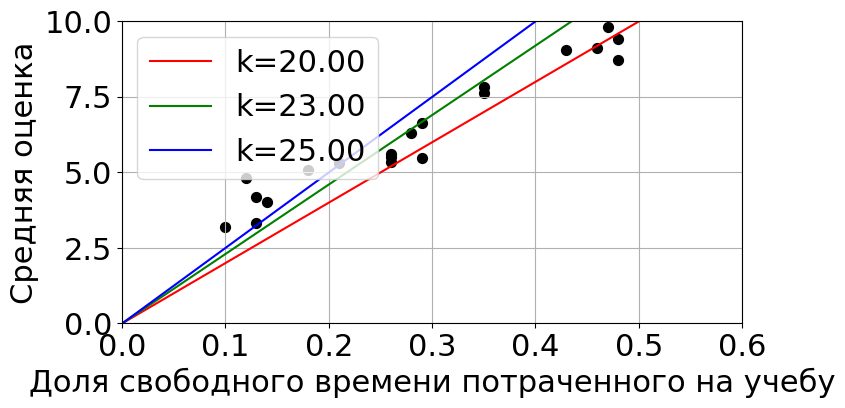

In [14]:
plot_several_good_linear_functions(X, y)

Какая функция лучшая?

## Функция ошибки

Для это введем **функцию ошибку**, также известную как **функцию потерь** или **loss function**. 

Функция ошибки - численное значение того, насколько хорошо наша функция описывает данные. В данном случает это то, насколько предсказанные значения нашей функции отличаются от реальных.

Обозначается функция потерь как $Loss$, $L$ или $J$. Мы будем использовать $Loss$.

Лучше всего не использовать значение $L$. $L$ - часто используется как обозначение для функции правдоподобия, которая также часто используется в машинном обучении.

## Визуализируем функцию ошибки

Давайте визуализируем разницу между точками которые предсказывает функция $f(X) = kX$ и реальными данными.

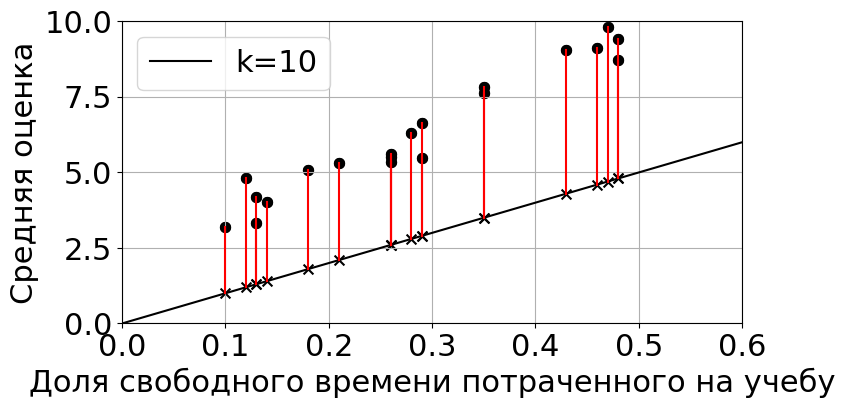

In [15]:
plot_data_and_linear_function_with_error(X, y, k=10)

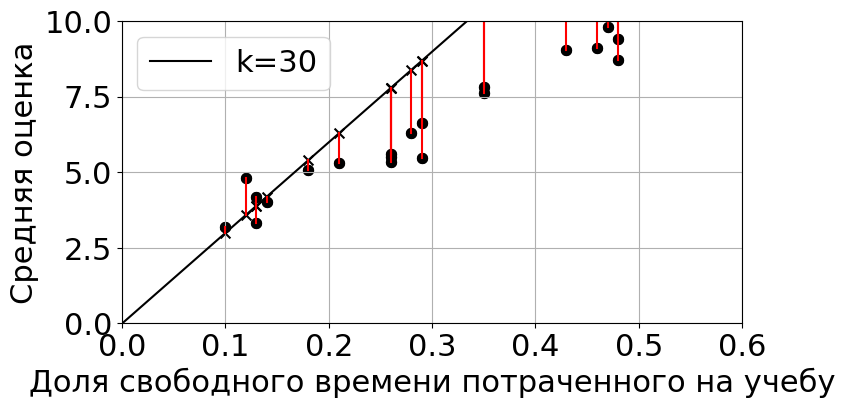

In [16]:
plot_data_and_linear_function_with_error(X, y, k=30)

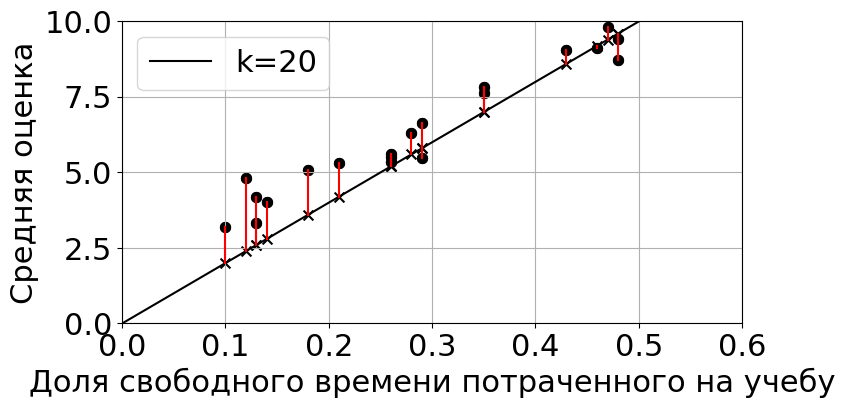

In [17]:
plot_data_and_linear_function_with_error(X, y, k=20)

## Функция ошибки

Пусть у нас есть функция:  

$\widetilde{y} = f(X) = kX$

Тогда $\widetilde{y}$ - это предсказанные нами значения для $X$. 

А настоящие значения будут равны $y$. 

Тогда ошибку нашего предсказания на $i$-ом примере $\widetilde{y}_i$ можно посчитать как: 

$error = \widetilde{y}_i - y_i$

Если нам не важно в большую или в меньшую сторону мы ошибаемся, можем избавиться от знака, взяв либо модуль, либо квадрат ошибки. Для начала давайте возьмем квадрат. О модуле мы поговорим в следующих уроках. Тогда ошибка $loss_i(k)$ на $i$-ом примере будет равна:

$loss_i(k) = (\widetilde{y}_i - y_i)^2$

$loss_i(k) = (kX_i - y_i)^2$

## Выведим функции ошибок

$error = \widetilde{y}_i - y_i$

In [18]:
k = 25
error_on_sample(X, y, k)

Разница на примере 0 равна -0.68
Разница на примере 1 равна -1.8
Разница на примере 2 равна -0.06
Разница на примере 3 равна -0.93
Разница на примере 4 равна -0.53
Разница на примере 5 равна -0.58
Разница на примере 6 равна -0.06
Разница на примере 7 равна 1.15
Разница на примере 8 равна 0.89
Разница на примере 9 равна 0.98
Разница на примере 10 равна 0.69
Разница на примере 11 равна 0.61
Разница на примере 12 равна 1.78
Разница на примере 13 равна 0.92
Разница на примере 14 равна 1.12
Разница на примере 15 равна 1.71
Разница на примере 16 равна 2.39
Разница на примере 17 равна 1.92
Разница на примере 18 равна 2.58
Разница на примере 19 равна 3.29


Давайте посмотрим на квадрат разности между предсказанными значение и реальным для коэффициента $k = 25$.

$loss_i(k) = (kX_i - y_i)^2$

In [19]:
k = 25
quad_error_on_sample(X, y, k)

Квадрат разницы на примере 0 равен 0.4624
Квадрат разницы на примере 1 равен 3.24
Квадрат разницы на примере 2 равен 0.0036
Квадрат разницы на примере 3 равен 0.8649
Квадрат разницы на примере 4 равен 0.2809
Квадрат разницы на примере 5 равен 0.3364
Квадрат разницы на примере 6 равен 0.0036
Квадрат разницы на примере 7 равен 1.323
Квадрат разницы на примере 8 равен 0.7921
Квадрат разницы на примере 9 равен 0.9604
Квадрат разницы на примере 10 равен 0.4761
Квадрат разницы на примере 11 равен 0.3721
Квадрат разницы на примере 12 равен 3.168
Квадрат разницы на примере 13 равен 0.8464
Квадрат разницы на примере 14 равен 1.254
Квадрат разницы на примере 15 равен 2.924
Квадрат разницы на примере 16 равен 5.712
Квадрат разницы на примере 17 равен 3.686
Квадрат разницы на примере 18 равен 6.656
Квадрат разницы на примере 19 равен 10.82


## Реализации функции ошибки в Python

In [20]:
k = 25
# f(X, k) возвращает массив ndarray
# y также массив ndarray
# И как мы помним из предыдущего урока, в NumPy реализована возможность поэлементной разности между массивами
errors = f(X, k) - y

print(errors)

[-0.68 -1.8  -0.06 -0.93 -0.53 -0.58 -0.06  1.15  0.89  0.98  0.69  0.61
  1.78  0.92  1.12  1.71  2.39  1.92  2.58  3.29]


Теперь, за счет того, что в NumPy есть возможность поэлементного возведение в степень, посчитать квадратичную разность не составит труда.

In [21]:
k = 25
quad_errors = (f(X, k) - y)**2
print(quad_errors)

[4.62400e-01 3.24000e+00 3.60000e-03 8.64900e-01 2.80900e-01 3.36400e-01
 3.60000e-03 1.32250e+00 7.92100e-01 9.60400e-01 4.76100e-01 3.72100e-01
 3.16840e+00 8.46400e-01 1.25440e+00 2.92410e+00 5.71210e+00 3.68640e+00
 6.65640e+00 1.08241e+01]


## Функция ошибки на всех примерах

Мы можем посчитать среднюю ошибку $Loss(k)$ на всех примерах:

$\widetilde{y}_i = f(X_i) = kX_i$

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(\widetilde{y}_i - y_i)^2}$ 

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2}$

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

Где $N$ - это количество примеров.

Такая функция ошибки называется **среднеквадратичная ошибка (СКО)** или **mean squared error (MSE)**.


***Немного про нотацию***.

Функция потерь формально зависит от входных данных, реальных выходных данных, вида функции и параметров этой функции. 

$Loss(k) = Loss(X, y, f, k)$

Таким образом, сама функция потерь - это функция от одной переменной (параметра) $k$. 

## Реализация функции ошибки в Python

Для массива $X$ и реального значения $y$ необходимо реализовать функцию ошибки. 

На входе:


* Массив входных значений $X$;

* Массив реальных  выходных значений $y$;

* Коэффициент $k$ функции $f(X)=kX$;


На выходе:

* На выходе значение функции ошибки $Loss(k)$;

Формула функции ошибки:

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $


Формула функции ошибки:

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

In [22]:
def loss_function(X, y, k):
    
    N = X.shape[0]                    # получаем размер вектора столбца
    # или N = len(X)
   
    # создаем массив ошибок для каждого примера
    loss_for_sample = (k*X - y)**2
    
    # берем среднее значение
    loss = np.sum(loss_for_sample) / N      
    
    # или если переписать проще 
    # loss = np.mean((k*X - y)**2)
    return loss

k = 25
print(loss_function(X, y, k))

2.209365


## Ошибки для разных $k$

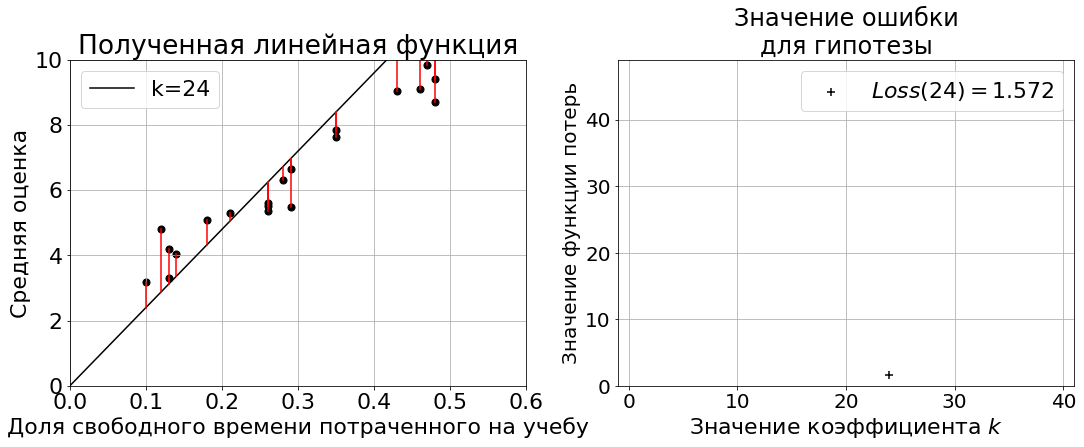

In [24]:
plot_data_and_function_with_error(X, y, k=24)

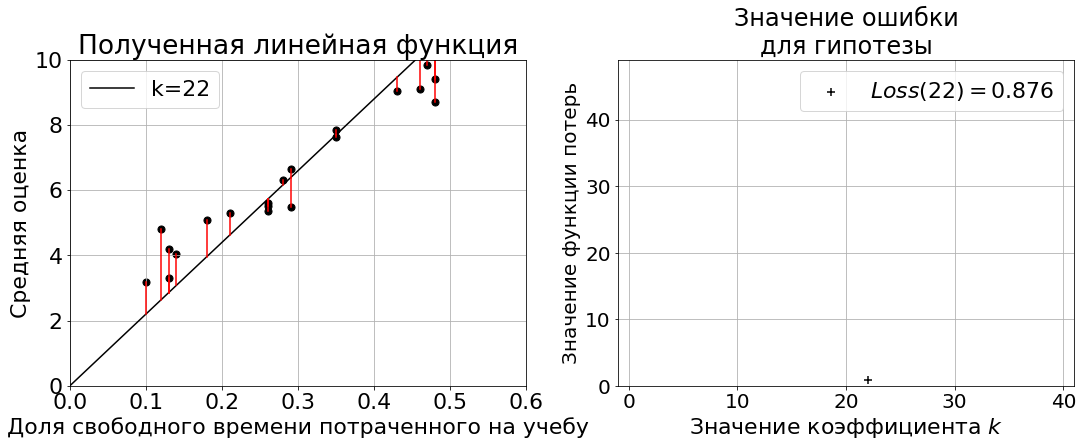

In [25]:
plot_data_and_function_with_error(X, y, k=22)

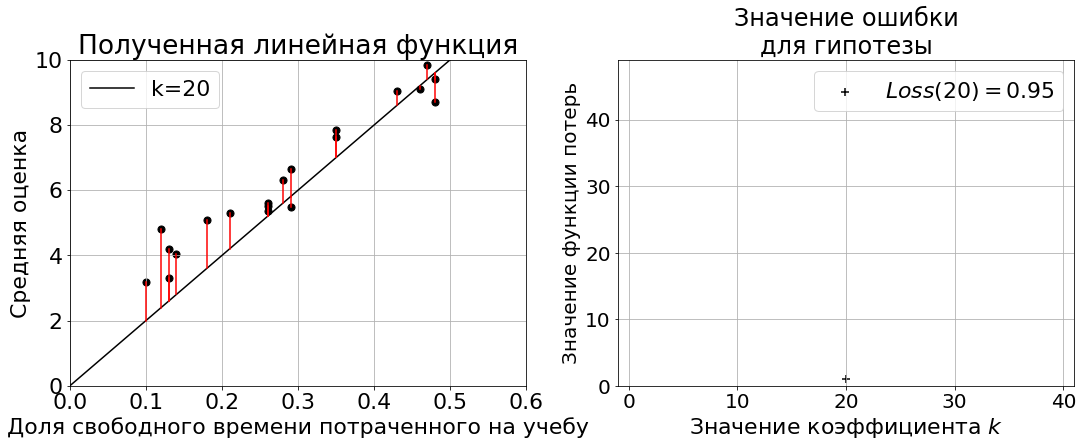

In [23]:
plot_data_and_function_with_error(X, y, k=20)

# Ошибки для всех функция значений $k$

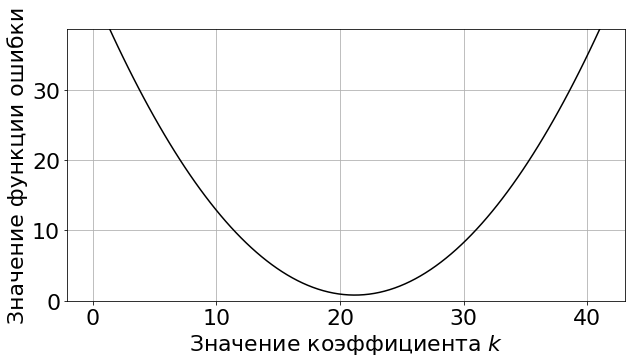

In [26]:
plot_all_loss(X, y)

## Производная функции

Наша задача - это минимизации функции ошибки. То есть, нужно найти такое $k$, для которого функция $Loss(k)$ имеет минимальное значение.

### Определение

Производная функции $f(x)$ записывается как $f'(x)$ или же как $\dfrac{d f(x)}{dx}$. Мы будем применять оба варианта.

Насколько значение функции меняется в зависимости от изменения входного значения. 

*Математически это выглядит так:*

$f'(x_0) = lim_{\Delta x \rightarrow 0}\dfrac{\Delta y}{\Delta x} = lim_{\Delta x \rightarrow 0}\dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

Более простое определение.

$y = f(x)$.

Возьмем точку $x_0$. 

$y_0 = f(x_0)$. 

А теперь возьмем точку рядом с $x_0$. Это можно сделать прибавив (или отняв) от $x_0$ какое-нибудь маленькое значение. Назовем его $\Delta x$. 

$y_1 = f(x_0 + \Delta x)$.


$\Delta y = y_1 - y_0 = f(x_0 + \Delta x) - f(x_0)$

И если разделить $\Delta y$ на $\Delta x$ то это и будет производная в точке $x_0$.


То есть, производная равна:

$f'(x_0) = \dfrac{d f(x_0)}{dx} $

$f'(x_0) = \dfrac{\Delta y}{\Delta x} = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

$\Delta x \rightarrow 0$

### Геометрическая интерпритация

Посмотрим на функцию $f(x) = x^2 + 1.5$. 

$\Delta y = f(x_0+\Delta x) - f(x_0)$

$f'(x_0) = \dfrac{\Delta y}{\Delta x}$

#### Возрастающая функция в точке

 Рассмотрим пример производной для нее в точке $x_0 = 1.4$.

In [27]:
x0 = 1.4
derivation(x0)

A Jupyter Widget

Красная точка - это значение функции $f(x_0)$ в точке $x_0$. 

Синяя точка - это значение функции $f(x_0+\Delta x)$ в точке $x_0+\Delta x$. 


Между синей и крестной точки проведена секущая. Угол между ней и осью $X$ обозначим как $\alpha$. 

Угол между катетом ${\Delta x}$ и гипотенузой равен $\alpha$.  

Из геометрии мы знаем что $tg(\alpha) = \dfrac{\Delta y}{\Delta x}$

$f'(1.4) = 2.8$. 

#### Убывающая функция в точке.

Рассмотрим пример производной для функции в точке $x_0 = -1.3$.

In [28]:
x0 = -1.3
derivation(x0)

A Jupyter Widget

Можно считать, что производная в точке показывает "скорость" изменения функции. Она положительна если функция растет вокруг точки и отрицательна, когда функция убывает.

Еще ее можно интерпретировать как тангенс угола наклона $\alpha$ касательной к точке.

Обычно пишут что $f'(x_0) = tg(\alpha)$.

То есть, если производная **положительная** в точке $x_0$, и мы возьмем значение немного *больше* чем $x_0$, то мы увидим, что значение функции в новой точке *возросло*. А если взять значение *меньшее* $x_0$, то значение функции будет *меньше* чем в точке $x_0$.

Наоборот с отрицательным значением производной. Если производная **отрицательна** в точке $x_0$, и мы возьмем значение чуть *больше* чем $x_0$, то мы увидим, что значение функции *уменьшилось*. А если взять значение *меньшее* $x_0$, то значение функции будет *больше* чем в точке $x_0$.

#### Производная в экстремуме

Рассмотрим поведение производной в экстремумах. 

In [29]:
x0 = 0
derivation(x0)

A Jupyter Widget

#### Аналитический вывод производной

Давайте посмотрим на производную для всех точек.

In [30]:
plot_simple_func_and_der()

A Jupyter Widget

#### Так зачем нам это все? Как это поможет нам решить проблему?

Я вам напомню, что наша задача найти минимум нашей функции потеть $Loss(k)$.

Вернемся к нашей функции ошибки посмотрим на ее производные в разных точках:

In [31]:
plot_data_and_loss(X, y, with_der=True)

A Jupyter Widget

Допустим мы видим что производная равна отрицательному значению. Это значит что функция ошибки в окрестности данной точки убывает. То есть, если взять $k$ поменьше, то ошибка будет расти, а если по больше, то ошибка будет убывает.

А теперь допустим производная положительна. Это значит что функция ошибки в окрестности данной точки возрастает. То есть, если взять $k$ побольше, то ошибка будет расти, а если поменьше, то ошибка будет убывать.

Но сначала давайте возьмем производную от нашей функции ошибки. Для этого рассмотрим следующие свойства производной.

#### Свойства производных

##### Элементарные функции

Сначала посмотрим на таблицу с производными для элементарных функций (некоторых).

| Элементарная функция $f(x)$ | Производная $\dfrac{df(x)}{dx}$
| -----  | --- |
|  $a$   |  0  |
|  $x$   |  1  |
|  $ax$  |  a  |
|  $x^2$  |  $2x$ |
|  $x^n$  |  $nx^{n-1}$ |
|  $\ln(x)$  |  $\dfrac{1}{x}$ |
|  $ \sin (x)$  | $\cos (x)$  |
|  $\cos(x)$   |  $-\sin (x)$ |
|  $e^x$   |  $e^x$ |
|  $a^x$   |  $a^x \ln (a)$ |

$a$ - это константа.

*Пример:*

$\dfrac{dx^3}{dx} = (x^3)' = 3x^2$

##### Производная функции умноженную на константу

$(af(x))' = af'(x)$

*Пример:*

$(10x)' = 10$

$(20.1 x^3)' = 20.1 \cdot 3 x^2 = 60.3 x^2$

##### Производная суммы

Производная суммы (разности) равна сумме (разности) производных:

Для двух функций:
$(f_1(x) + f_2(x))' = f_1'(x) + f_2'(x)$

В общем случае: $\left(\sum_n f_n(x) \right)' = \sum_n f_n'(x)$

*Пример:*

$f(x) = 3x^2 + 20ln(x) + 3$

$f'(x) = (3x^2 + 20ln(x) + 3)'$

$f'(x) = (3x^2)' + (20ln(x))' + (3)'$

$f'(x) = 3\cdot2x + 20\cdot \dfrac{1}{x} + 0$

$f'(x) = 6x + \dfrac{20}{x}$

##### Производная сложной функции

При взятии производной сложной функции использоваться цепное правило (chain rule).

Интуитивное понимание. Мы смотрим какой порядок вычисления операций и вычисляем производную с последней операции по первую и перемножая их.

Пример: 

$f(x) = sin(e^{3x})$.

1. $u = 3x$

2. $v = e^u$

3. $y = sin(v)$

$\dfrac{df(x)}{dx} = \dfrac{d y}{dv} \dfrac{d v}{du} \dfrac{d u}{x} $

$\dfrac{df(x)}{dx} = \dfrac{d (sin(v))}{dv} \dfrac{d (e^u)}{du} \dfrac{d (3x)}{x} $

$\dfrac{df(x)}{dx} = cos(v) \cdot e^u \cdot 3x = cos(e^{3x}) \cdot e^{3x} \cdot 3x$


Математически это так:

$v = \psi(x)$

$u = \phi(v)$

$y= f(u)$

$\dfrac{df(x)}{dx} = \dfrac{df(u)}{du} \cdot \dfrac{du(v)}{dv} \cdot \dfrac{dv(x)}{dx}$

*Еще пример:*

$y = ln(10x)$

$u = 10x$

$y = ln(u)$

$\dfrac{dy}{dx} = \dfrac{d (ln(u))}{du} \cdot \dfrac{d(10x)}{dx}$ 

$\dfrac{d( ln(u))}{du} = \dfrac{1}{u}$

$\dfrac{d(10x)}{dx} = 10$

$\dfrac{dy}{dx} = \dfrac{1}{u} \cdot 10 = \dfrac{10}{10x} =  \dfrac{1}{x}$

*Пример:*

$f(x) = (10x^2 + x)^3$

$\dfrac{dy}{dx} = 3(10x^2 + x)^2 \cdot(20x + 1) $

### Производная функция ошибки

Напомню, как выглядит наша функция ошибки.

$ J(k) = \dfrac{1}{N}\sum_{i=1}^{N}{(\widetilde{y}_i - y_i)^2} $,

$ J(k) = \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} $.

Ее производная обозначается так:

$ \dfrac{d(J(k))}{dk} = \dfrac{d  \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right) }{dk} $.

Важно помнить, что в данном случае мы считаем, что $X$ и $y$ это константы.

Для простоты обозначим производную это так:

$ \dfrac{d \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right) }{dk} =  \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k'$

$\left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k' = \dfrac{1}{N} \left( \sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k'$

$ \dfrac{1}{N} \left( \sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k' = \dfrac{1}{N}  \sum_{i=1}^{N}\left((kX_i  - y_i)^2 \right)_k'$

Осталось взять производную того, что под знаком суммы. 

$f(k) = (kX_i  - y_i)^2$

$u = kX_i  - y_i$

$\dfrac{du^2}{du} = 2u = 2(kX_i  - y_i)$

$\dfrac{du}{dk} = \dfrac{d(kX_i  - y_i)}{dk} = \dfrac{d(kX_i)}{dk}  - \dfrac{d(y_i)}{dk} = X_i - 0 = X_i$

$ \dfrac{df(k)}{dk} = 2(kX_i  - y_i) \cdot X_i$

И собирая все вместе:

$ \dfrac{dJ(k)}{dk} = \dfrac{1}{N}  \sum_{i=1}^{N}2(kX_i  - y_i) X_i$

$\dfrac{dJ(k)}{dk} = \dfrac{2}{N}  \sum_{i=1}^{N}(kX_i  - y_i) X_i$

Посмотрим на то, как выглядит эта производная.

In [32]:
plot_loss_and_der(X, y, same=True)

A Jupyter Widget

## Использование производной для поиска минимума Loss

Рассмотрим, как мы можем использовать производную для решения нашей задачи. 

*У нас есть функция ошибки $Loss(k)$. Нужно найти такое $k_m$, при котором $Loss(k_m)$ принимает минимальное значение.*

Нужно взять производную функции ошибки и приравнять ее к нулю и решить уравнение относительно k. 

Этот метод называется методом наименьших квадратов (МНК).

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i = 0$

In [33]:
k_a = analytical_solution(X, y)
print(f"Аналитически решенное k={k_a}")

Аналитически решенное k=21.192693


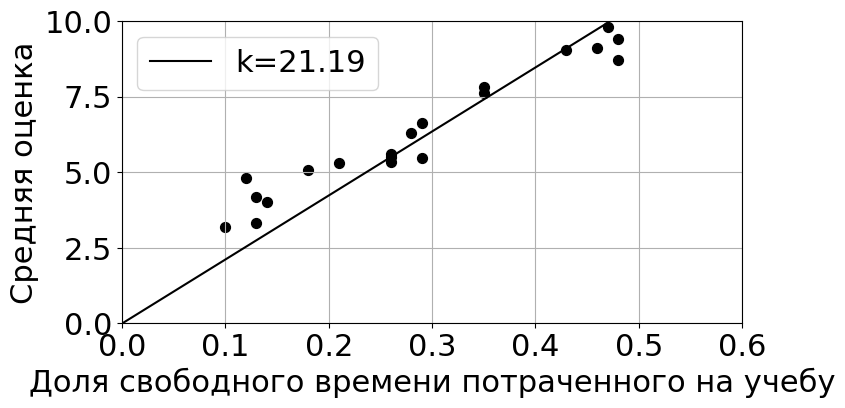

In [34]:
plot_data_and_hyp(X, y, k_a)

**Очень важно!**

Посчитать коэффициент аналитически можно только в данном простом, учебном примере. Но в реальных примерах не всегда возможно решить это уравнение. 

## Градиентный спуск

Идею градиентной спуска мы обсуждали ранее.

Давайте еще раз посмотрим на функцию и ее производную.

In [35]:
plot_loss_and_der(X, y, der_value=True)

A Jupyter Widget

Единственный вопрос, а на какое значение менять $k$?

Хотелось бы менять его на большое значение, когда $k$ мы далеко от минимума функции. И менять $k$ не сильно, когда мы близко к минимуму.

Алгоритм градиентного спуска можно описать следующим образом:

* Выбираем случайное значение для $k$
* Повторяем $iter$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d  J(k)}{dk}$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$,

где $\alpha$ это коэффициент, который мы выбреем. Он называется коэффициент обучения (learning rate).

Давайте реализуем подсчет производной.

Для входных данных массива $X$, реального выходного значения $y$ и параметра $k$ необходимо реализовать подсчет производной. 

На входе:

* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Коэффициент $k$ функции $f(X)=kX$;


На выходе:

* На выходе значение производной функции ошибки $Loss'(k)$

Формула производной функции ошибки:

$Loss'(k) = \dfrac{2}{N} \sum_{i=0}^{N}{(kX_i - y_i)X_i} $


In [36]:
def derivative_function(X, y, k):
    # С помощью f(X, k) мы находим массив предсказанных значений и вычитаем из него массив реальных выходных значений
    # Эту разность мы поэлементно умножаем на массив Х
    # С помощью функции np.mean мы получаем среднее значение массива.
    # np.mean(X) эквивалентной np.sum(X)/len(X)
    
    derivative = 2*np.mean((f(X, k) - y) * X)
    return derivative   

k = 1
print(derivative_function(X, y, k))

-3.89093


Теперь давайте реализуем градиентный спуск.

Для входных данных массива $X$, реального выходного значения $y$, начального значения $k_{init}$, значения параметра $\alpha$ необходимо реализовать градиентный спуск. 

На входе:

* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Начальный коэффициент функции $k_{init}$;

* Коэффициент обучения $\alpha$;

* Количество итераций алгоритма $iter$;

На выходе:

* На выходе значение коэффициента $k$

Алгоритм градиентного спуска:

* Выбираем случайное значение для $k$
* Повторяем $iter$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d  J(k)}{dk}$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$. 

In [37]:
def gradient_descent(X, y, k_init, alpha, iters):
    
    # инициализируем начальное значение
    k = k_init
    
    # выполняем iters раз
    for i in range(0, iters):
        # считаем производную, умножаем ее на коэффициент обучение
        # меняем коэффициент на значение производной умноженной на альфу
        k = k - (alpha * derivative_function(X, y, k))
        
        # Можно заменить на 
        # k -= alpha * derivative_function(X, y, k)
    # возвращаем посчитанное значение
    return k

k_init = 1.0
alpha = 1
iters = 100
k_gd = gradient_descent(X, y, k_init, alpha, iters)

print(f"Значение после градиентного спуска k={k_gd}")

Значение после градиентного спуска k=21.19269291624745


In [38]:
print(f"Аналитически решенное k={k_a}")

Аналитически решенное k=21.192693


In [39]:
print(f"Значение функции ошибки после обучения {loss_function(X, y, k_gd)}")

Значение функции ошибки после обучения 0.812787655820229


In [40]:
print(f"Значение функции ошибки для аналитического решения {loss_function(X, y, k_a)}")

Значение функции ошибки для аналитического решения 0.8127876558202299


In [41]:
print(f"Разница функция ошибок {loss_function(X, y, k_a) - loss_function(X, y, k_gd)}")

Разница функция ошибок 8.881784197001252e-16


Посмотрим как ведет себя алгоритм с различными параметрами $\alpha$.

In [42]:
interactive_gradient_descent(X, y)

A Jupyter Widget

## Как это можно использовать?

In [43]:
# загружаем линейную регрессию из библиотеки sklearn
# в ней реализован класс LinearRegression
from sklearn.linear_model import LinearRegression

# создаем объект линейной регрессии. не обращайте внимание на атрибут fit_intercept
lr = LinearRegression(fit_intercept=False)

# обучаем нашу модель. То есть, запускаем алгоритм, который находит оптимальные параметры. 
# нужно будет немного поменять shape входных данных
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# И получаем значение коэффициента
k_sklearn = lr.coef_[0, 0]

In [44]:
print(f" Абсолютная разница между коэффициентами посчитанным нами и посчитанным sklean'ом {abs(k_gd - k_sklearn)}")

 Абсолютная разница между коэффициентами посчитанным нами и посчитанным sklean'ом 1.0214751711146164e-08


Давайте посмотрим на наш конечный результат.

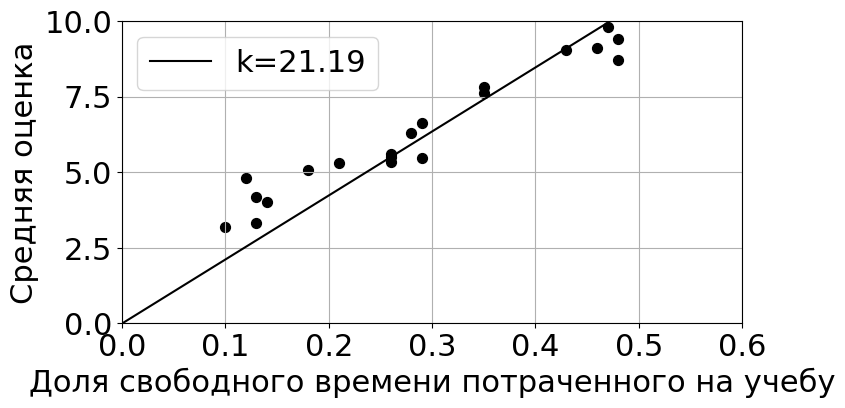

In [45]:
plot_data_and_hyp(X, y, k_gd)

# Немного усложним пример

В качестве гипотезы мы использовали функцияю вида $f(X) = kX$.

Такой вид фукнции всегда будет выходить из 0.

Линейная функцию на самом деле выглядит так:

$f(X) = kX + b$.

Давайте на нее посмотрим.

In [46]:
choose_slope_with_bias(X, y)

A Jupyter Widget

Давайте изменим гипотезу и теперь будем использовать "настоящую" линейную функцию.

Перепишем функцию ошибки:

$\hat{y} = f(X) = kX + b$.



$error_i(k, b) = (\hat{y_i} - y_i)^2 = ((kX_i + b) - y_i)^2$.

На всех примерах:

$Loss(k, b) = \dfrac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b) - y_i)^2} $



Можно заметить, что теперь у нас ошибка зависит не только от $k$, но и от $b$.

Давайте посмотрим, как теперь выглядит функция ошибки. 

In [47]:
plot_linear_loss_in_3d(X, y)

A Jupyter Widget

Но проще всего нам просто смотреть на функцию сверху.

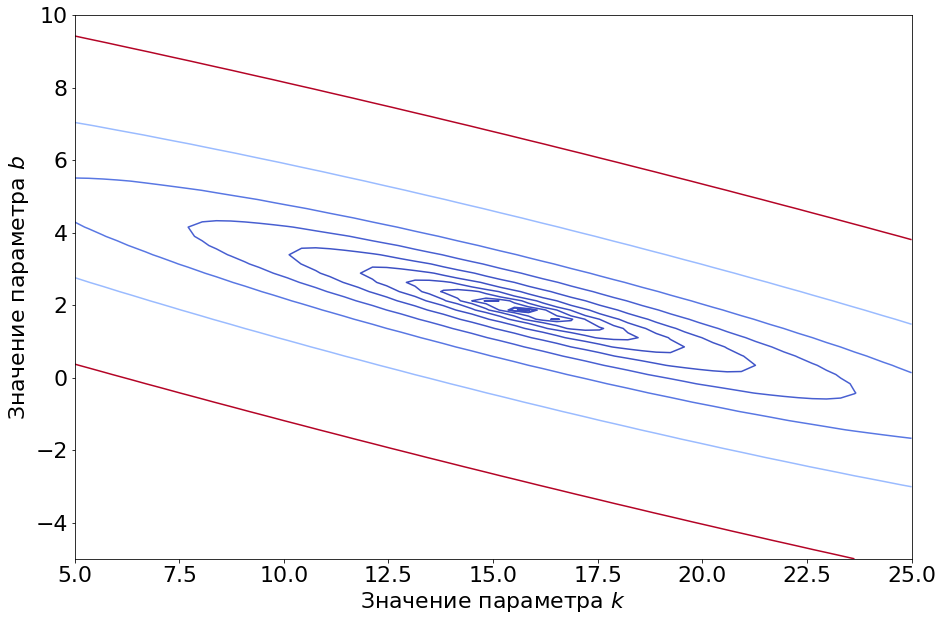

In [48]:
plot_linear_loss_in_3d_up(X, y)

У нас есть функция ошибки. Но теперь она от двух параметров. Что нам теперь делать?

## Градиент

Давайте введем понятие градиента.

Градиент функции $\phi(x_0, x_1, \ldots x_N)$ от $N$ переменных это $N$ значений: 

$\dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_0}, \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_1}, \ldots \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_N}$

Обозначается как $grad (\phi)$ или  $\nabla \phi$

Например, градиент функции $\phi(x, y)$  от двух переменных это:

$grad (\phi) = \nabla \phi = \left[\dfrac{\delta \phi(x, y)}{\delta x}; \dfrac{\delta \phi(x, y)}{\delta y} \right]$

Эти значения можно считать координатами вектора (в декартовой системе координат) и их можно записать как: 

$grad (\phi) = \nabla \phi = \dfrac{\delta \phi(x, y)}{\delta x} \cdot \overleftarrow{i} + \dfrac{\delta \phi(x, y)}{\delta y} \cdot \overleftarrow{j}$

$\dfrac{\delta \phi(x, y)}{\delta x}$ - это *частная* производная по $x$.

$\dfrac{\delta \phi(x, y)}{\delta y}$ - это частная производная по $y$.

Частная производная - это производная по какой-либо переменной, например $x$, где остальные переменные мы считаем константой.

### Пример вычисления градиента

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} =
\dfrac{\delta (1.5x + 2.5)^2 }{\delta x} +
\dfrac{\delta (2.5y^2)  }{\delta x} +
\dfrac{\delta (0.5) }{\delta x}
= 1.5 \cdot 2(1.5x + 2.5) + 0 + 0= 4.5x + 7.5$
 

$\dfrac{\delta \phi(x, y)}{\delta y} =
\dfrac{\delta (x + 1.5)^2 }{\delta y} +
\dfrac{\delta (2.5y^2)  }{\delta y} +
\dfrac{\delta (0.5) }{\delta y}
= 0 + 2 \cdot 2.5y + 0= 5y$

Давайте визуализируем  функцию $\phi(x, y) = (x + 1.5)^2 + 2.5y^2 + 0.5$.

In [49]:
plot_func_in_3d()

A Jupyter Widget

Рассмотрим ее сверху.

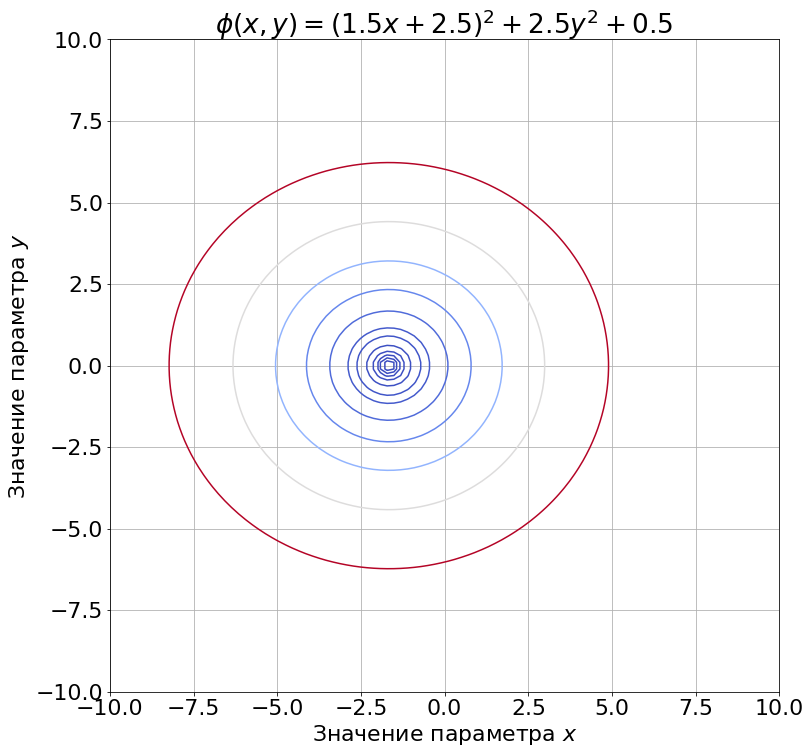

In [50]:
plot_3d_func_with_grad()

Теперь посчитаем на ее градиент (подробно он был рассчитан выше).

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 4.5x + 7.5$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

Тогда сам градиент из точки (0.4; 0.8) это вектор с началом из этой точки, который направленный в сторону **от** минимума.

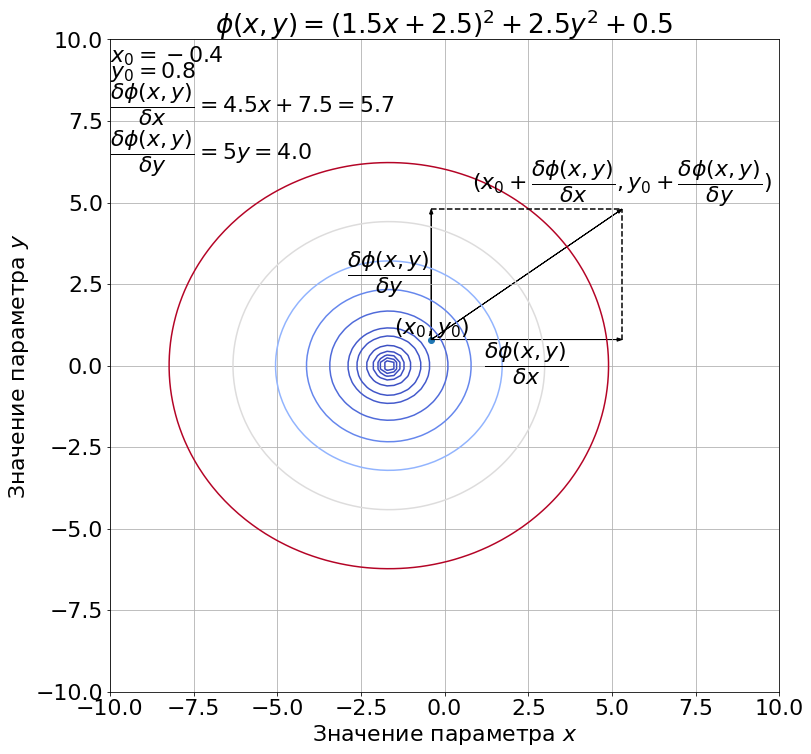

In [51]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='positive')

И если мы возьмем отрицательный градиент (антиградиент), то этот вектор будет направлен **в** сторону минимума.

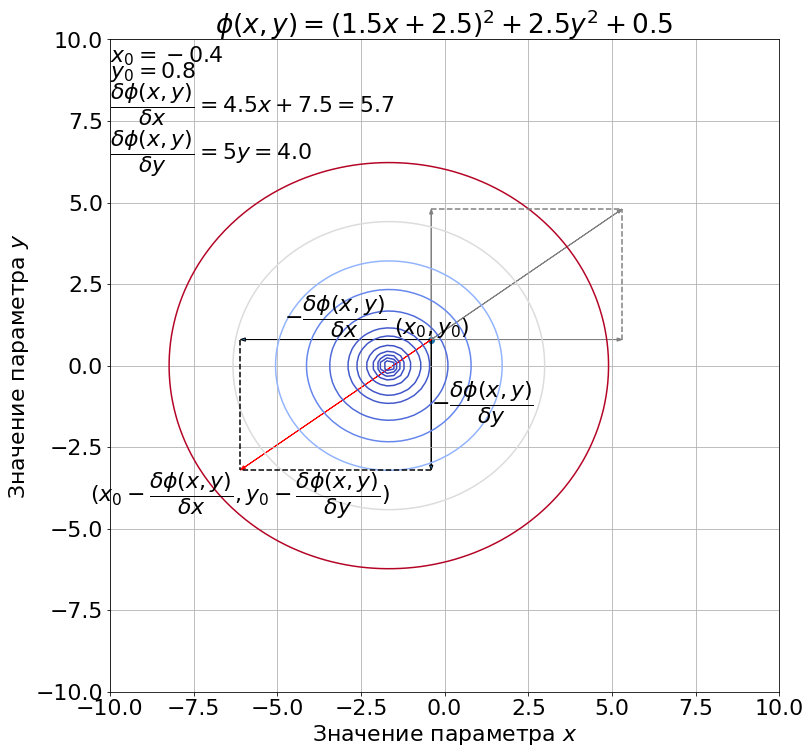

In [52]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='negative')

In [53]:
plot_3d_func_with_grad_interactive()

A Jupyter Widget

### Градиент функции ошибки

Наша функция ошибки зависит от двух параметров $k, b$:

$Loss(k, b) = \dfrac{1}{N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{( (k X + b)  - y_i)^2}$

Тогда градиент функции ошибки будет следующий:

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{1}{N} \sum_{i=1}^{N} 2((k X_i + b)  - y_i)\dfrac{\delta ((k X_i + b)  - y_i) }{\delta b}$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)( 0 + 1 + 0)$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)$ 

$\dfrac{\delta Loss(k, b)}{\delta k} = \dfrac{1}{N} \sum_{i=1}^{N} 2((k X_i + b)  - y_i)\dfrac{\delta ((k X_i + b)  - y_i) }{\delta k}$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)( X_i + 0 + 0)$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i$ 

$\nabla Loss(k, b) = \left[\dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i ; \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i) \right]$

Тогда алгоритм градиентного спуска теперь можно переписать как:

* Выбираем случайное значение для $k$ и $b$
* Повторяем $iter$ раз:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b_{new} = b  - \alpha \cdot \dfrac{\delta J(k, b)}{\delta b} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{\delta J(k, b)}{\delta k} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b = b_{new}$, 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $k = k_{new}$
    

где $\alpha$ это коэффициент обучения.

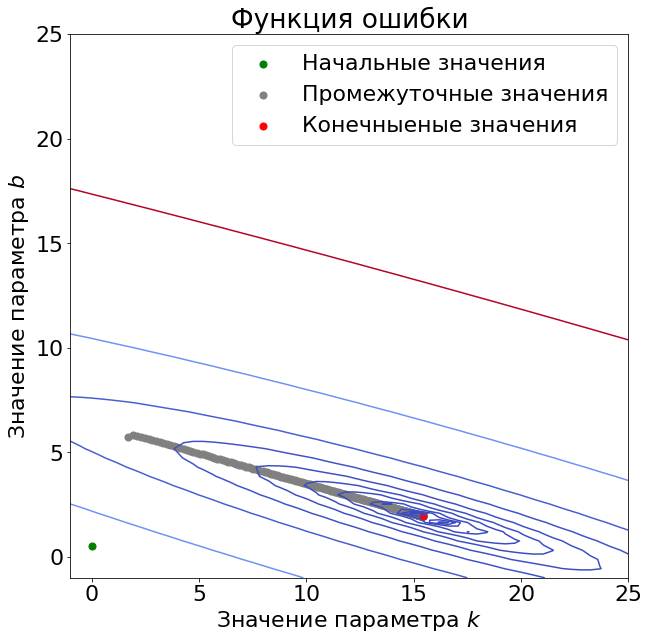

In [54]:
#alpha=0.75 интересный случай
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=300, alpha=0.45)

In [55]:
print(f"Значение функции ошибки после обучения {linearn_loss_function(X, y, k_gd, b_gd)}")

Значение функции ошибки после обучения 0.23464960386571515


Визуализируем результат.

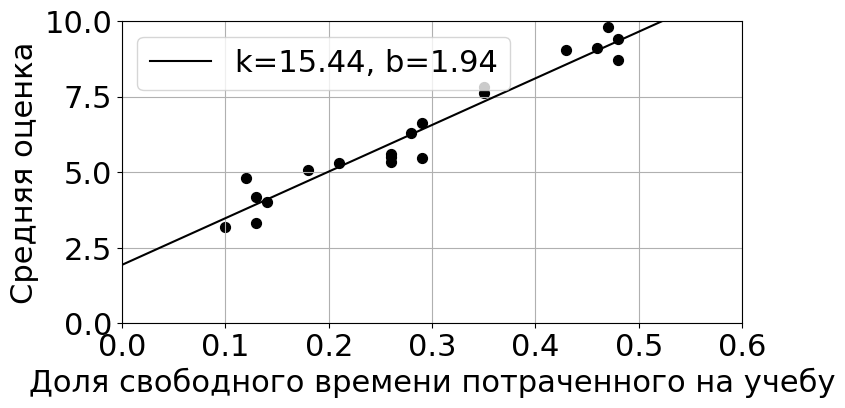

In [56]:
plot_data_and_hyp_with_bias(X, y, k_gd, b_gd)

Давайте теперь посмотрим, как высчитывался градиент и менялась целевая функция на разных итерациях градиентного спуска.

In [57]:
plot_gradient_descent_in_3d_interactive(X, y, iters=200, alpha=0.6)

A Jupyter Widget

### Приминение sklearn для решения задачи линейной регресии

In [58]:
# создаем объект линейной регрессии. 
lr = LinearRegression()

# до этого мы создавали его так LinearRegression(fit_intercept=False)
# этот параметр отвечал за вид функции 
# при fit_intercept=False используется функция f(x) = kx
# если не указывать этот параметр, то используется функция f(x) = kx + b

# обучаем нашу модель
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# И получаем значение коэффициентов
k_sklearn = lr.coef_[0, 0]
b_sklearn= lr.intercept_[0]

In [59]:
print(f"Значения коэффициентов k={k_sklearn} и b={b_sklearn}")

Значения коэффициентов k=15.692789281745474 и b=1.8690942386251583


In [60]:
print(f"Значение функции ошибки после обучения {linearn_loss_function(X, y, k_sklearn, b_sklearn)}")

Значение функции ошибки после обучения 0.233608517005525


In [61]:
print(f"Значение коэффициентов после градиентного спуска k={k_gd}, b={b_gd},  ")
print(f"Значение коэффициентов посчитанное с помощью skealrn k={k_sklearn}, b={b_sklearn}")

Значение коэффициентов после градиентного спуска k=15.43763181840416, b=1.9425156685961635,  
Значение коэффициентов посчитанное с помощью skealrn k=15.692789281745474, b=1.8690942386251583


In [62]:
print(f"Абсолютная разница между параметрами k: {abs(k_gd - k_sklearn)}")

Абсолютная разница между параметрами k: 0.2551574633413143


In [63]:
print(f"Абсолютная разница между параметрами b: {abs(b_gd - b_sklearn)}")

Абсолютная разница между параметрами b: 0.0734214299710052


In [64]:
print(f"Абсолютная разница ошибок {linearn_loss_function(X, y, k_gd, b_gd) - linearn_loss_function(X, y, k_sklearn, b_sklearn)}")

Абсолютная разница ошибок 0.001041086860190138


# Чему мы сегодня научились

* Линейная функция
* Функция потерь
* Производная
* Градиентный спуск
* Применение регрессии из sklearn

## Домашнее задание

Реализация градиентного спуска для функции вида: $f(X) = kX + b$

# Что дальше

* Что если наша целевая функция зависит от нескольких параметров?

* Что если нам нужно создать "кривую" функцию?

* Что такое нормализация данных

* Недообучение и переобучение

* Средняя абсолютная ошибка